# Steps of data analysis

+ Handle missing values
+ EDA
+ Normalize data
+ Encode data
+ Feature engineering/ Feature selection

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [4]:
df = pd.read_excel('D:\\Dengue-Forecasting-Sri-Lanka\\finalized_dataset\\finalized_dengue_dataset.xlsx')

### Checking missing values

In [7]:
df.isna().sum()

date                  0
district              0
rainfall              0
min temp              0
max temp              0
mean temp             0
wind speed            0
dew point             0
surface pressure      0
relative humidity     0
cloud coverage        0
solar radiation       0
min elevation         0
max elevation         0
mean elevation        0
tree_cover            0
urbanization          0
dengue_cases          0
population            0
cases_per_capita      0
disease_prevalence    0
dtype: int64

#### Therefore we can conclude that there are no any missing values here.

### EDA

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1975 entries, 0 to 1974
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   date                1975 non-null   datetime64[ns]
 1   district            1975 non-null   object        
 2   rainfall            1975 non-null   float64       
 3   min temp            1975 non-null   float64       
 4   max temp            1975 non-null   float64       
 5   mean temp           1975 non-null   float64       
 6   wind speed          1975 non-null   float64       
 7   dew point           1975 non-null   float64       
 8   surface pressure    1975 non-null   float64       
 9   relative humidity   1975 non-null   float64       
 10  cloud coverage      1975 non-null   float64       
 11  solar radiation     1975 non-null   float64       
 12  min elevation       1975 non-null   int64         
 13  max elevation       1975 non-null   int64       

In [15]:
df.head()

,date,district,rainfall,min temp,max temp,mean temp,wind speed,dew point,surface pressure,relative humidity,...,solar radiation,min elevation,max elevation,mean elevation,tree_cover,urbanization,dengue_cases,population,cases_per_capita,disease_prevalence
0,2014-01-31,Ampara,120.100373,21.923976,27.873376,24.505662,2.314742,21.814341,100151.778457,84.971592,...,448.725710,-20,858,65.859763,22.149158,1.989998,22,666000,0.000033,0.003303
1,2014-01-31,Kilinochchi,180.929063,24.255027,26.598590,25.392065,5.608055,21.751842,101258.291436,80.284197,...,512.065477,-17,59,12.929901,16.450222,1.982390,10,118000,0.000085,0.008475
2,2014-01-31,Polonnaruwa,229.751326,21.630108,27.934422,24.427670,2.485453,21.774447,100086.574836,85.161668,...,452.263704,-4,533,76.936726,25.892722,1.991564,75,416000,0.000180,0.018029
3,2014-01-31,Moneragala,84.614886,20.235332,27.398928,23.382532,1.833784,20.610192,97479.973849,84.431493,...,546.295895,14,1482,163.641252,28.197899,1.993537,23,467000,0.000049,0.004925
4,2014-01-31,Badulla,136.783082,19.026352,25.423810,21.777085,1.157021,19.490645,94261.459393,86.847910,...,451.608979,65,2218,623.716933,31.025144,2.022577,56,836000,0.000067,0.006699


In [9]:
df.describe()

,date,rainfall,min temp,max temp,mean temp,wind speed,dew point,surface pressure,relative humidity,cloud coverage,solar radiation,min elevation,max elevation,mean elevation,tree_cover,urbanization,dengue_cases,population,cases_per_capita,disease_prevalence
count,1975,1975.000000,1975.000000,1975.000000,1975.000000,1975.000000,1975.000000,1975.000000,1975.000000,1975.000000,1975.000000,1975.000000,1975.00000,1975.000000,1975.000000,1975.000000,1975.000000,1.975000e+03,1975.000000,1975.000000
mean,2017-04-30 14:34:56.202531328,169.283948,24.162019,30.263282,26.812365,3.034995,22.865828,99206.977526,79.286983,0.667155,664.664696,4.360000,911.44000,189.220491,32.507718,2.085822,248.684557,8.546435e+05,0.000248,0.024797
min,2014-01-31 00:00:00,0.000000,17.185297,24.407646,21.175728,0.382502,17.455001,92465.034356,55.805875,0.232886,333.537408,-35.000000,34.00000,6.616899,6.404997,1.961834,0.000000,9.500000e+04,0.000000,0.000000
25%,2015-08-31 00:00:00,46.763833,22.741758,28.818697,25.653127,1.681022,21.780103,99045.044720,75.215136,0.579681,587.314887,-14.000000,255.00000,34.520424,25.622268,1.991564,27.000000,4.750000e+05,0.000056,0.005553
50%,2017-04-30 00:00:00,116.039962,24.392768,29.934881,26.841745,2.706063,23.066393,100175.692228,80.260251,0.686038,673.431113,-9.000000,705.00000,71.123374,31.040072,2.008280,79.000000,7.560000e+05,0.000123,0.012254
75%,2018-12-31 00:00:00,250.447699,25.780480,31.706144,28.162619,4.182046,24.119002,100635.101197,84.607694,0.772266,751.378325,11.000000,1482.00000,163.641252,41.547343,2.060603,229.500000,1.114000e+06,0.000268,0.026750
max,2020-07-31 00:00:00,1161.690492,28.922537,36.089503,30.880208,9.230343,26.059354,101393.173610,91.777349,0.912086,856.403119,78.000000,2523.00000,1285.971990,54.326354,3.033678,9039.000000,2.455000e+06,0.005131,0.513107
std,NaN,163.136663,2.202138,2.127804,1.842274,1.706197,1.588094,2204.729184,6.546736,0.129064,102.000878,30.036764,765.48744,284.189740,11.138611,0.222613,534.436720,6.038271e+05,0.000391,0.039112


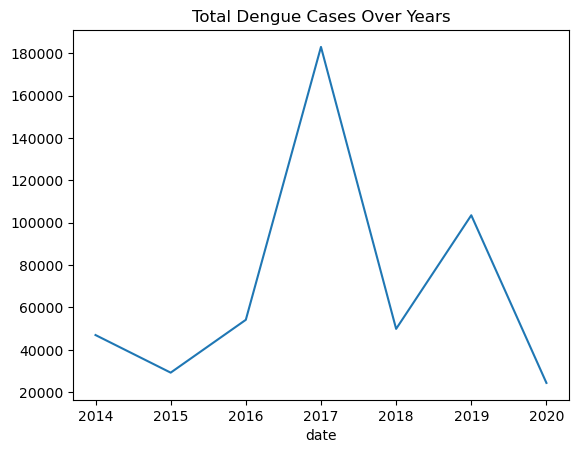

In [5]:
df['date'] = pd.to_datetime(df['date'])
df.groupby(df['date'].dt.year)['dengue_cases'].sum().plot(kind='line')
plt.title('Total Dengue Cases Over Years')
plt.show()

### There is a huge spike in around 2017

<Axes: xlabel='rainfall', ylabel='dengue_cases'>

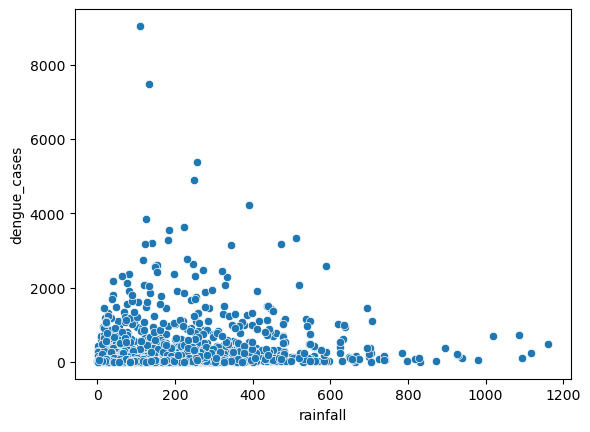

In [6]:
sns.scatterplot(x='rainfall', y='dengue_cases', data=df)


<Axes: xlabel='mean temp', ylabel='dengue_cases'>

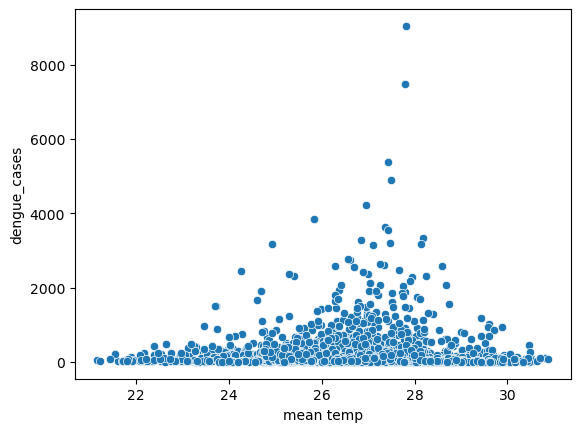

In [8]:
sns.scatterplot(x='mean temp', y='dengue_cases', data=df)

<Axes: xlabel='wind speed', ylabel='dengue_cases'>

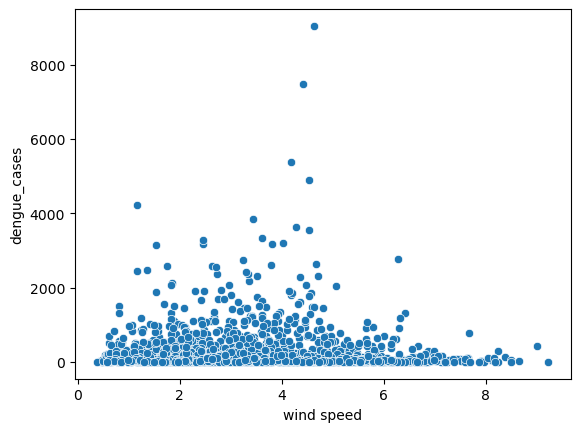

In [35]:
sns.scatterplot(x='wind speed', y='dengue_cases', data=df)

### We can see that the dengues cases are mostly clustereed aroundthe temperatures from 26 degrees to 29 degrees

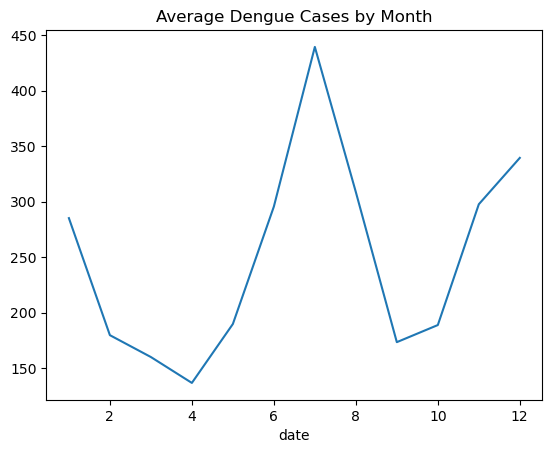

In [9]:
df.groupby(df['date'].dt.month)['dengue_cases'].mean().plot(kind='line')
plt.title('Average Dengue Cases by Month')
plt.show()

### In general seventh month has the highest number of recorded dengue cases

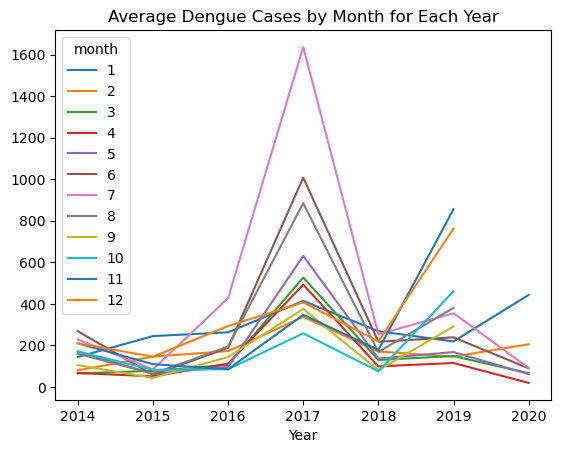

In [11]:
df.groupby([df['date'].dt.year, df['date'].dt.month])['dengue_cases'].mean().unstack().plot(kind='line')
plt.title('Average Dengue Cases by Month for Each Year')
plt.xlabel('Year')
plt.legend(title='month')
plt.show()



### Above conclusion is further concluded by this plot as we can see the line corrosponding to the seventh month generally satys above all the other months

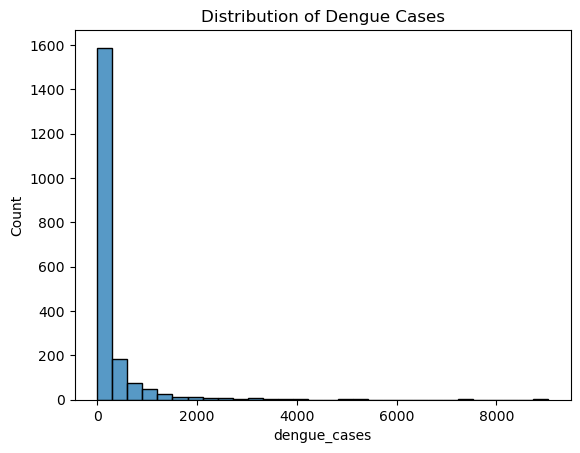

In [12]:
sns.histplot(df['dengue_cases'], bins=30)
plt.title('Distribution of Dengue Cases')
plt.show()

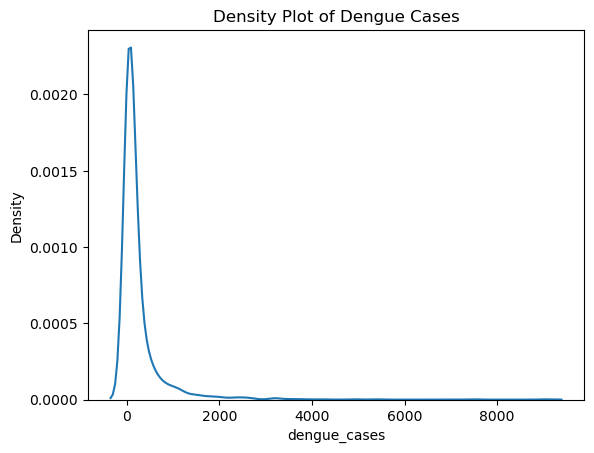

In [13]:
sns.kdeplot(df['dengue_cases'])
plt.title('Density Plot of Dengue Cases')
plt.show()

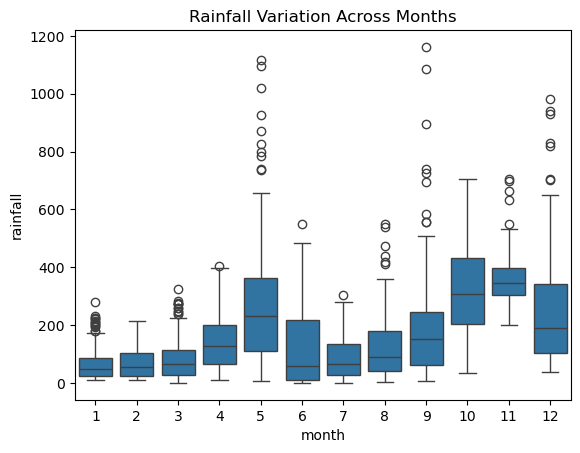

In [17]:
df['month'] = df['date'].dt.month

# Boxplot (Rainfall Across Months)
sns.boxplot(x='month', y='rainfall', data=df)
plt.title('Rainfall Variation Across Months')
plt.show()

### We can see that the 11 th month has the highest median rainfall

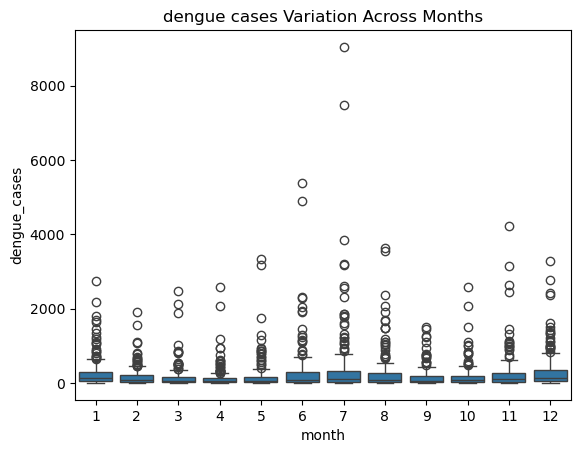

In [19]:
# df['month'] = df['date'].dt.month

# Boxplot (Rainfall Across Months)
sns.boxplot(x='month', y='dengue_cases', data=df)
plt.title('dengue cases Variation Across Months')
plt.show()

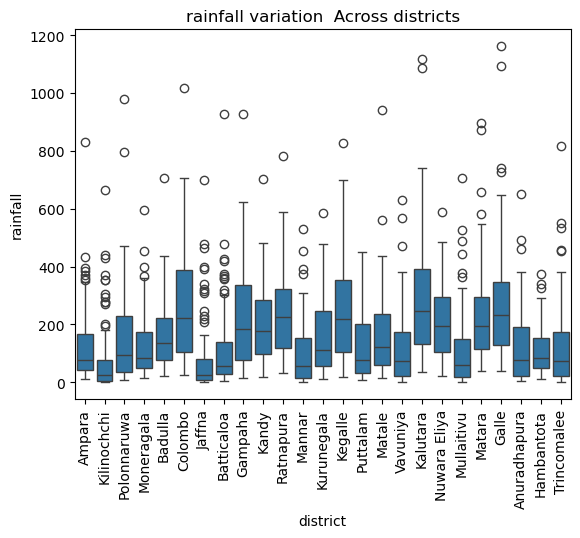

In [42]:
# df['month'] = df['date'].dt.month

# Boxplot (Rainfall Across Months)
sns.boxplot(x='district', y='rainfall', data=df)
plt.title('rainfall variation  Across districts')
plt.xticks(rotation=90)
plt.show()

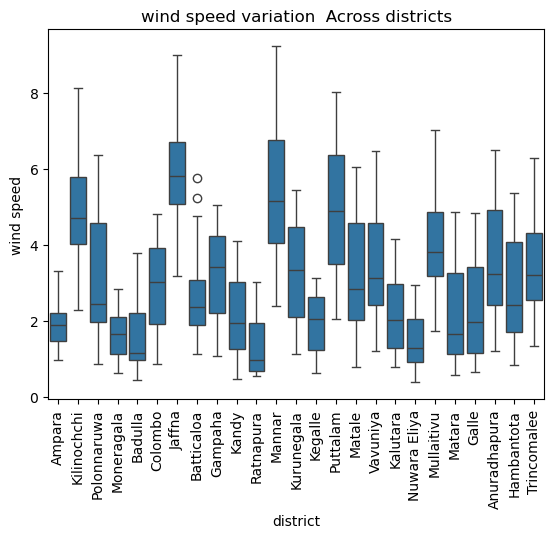

In [41]:
sns.boxplot(x='district', y='wind speed', data=df)
plt.title('wind speed variation  Across districts')
plt.xticks(rotation=90)
plt.show()

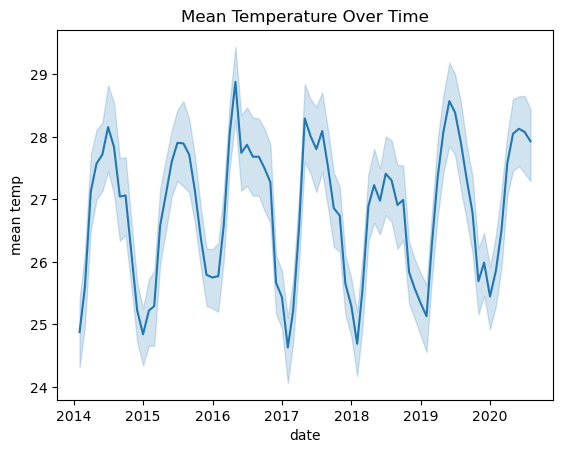

In [23]:
sns.lineplot(x='date', y='mean temp', data=df)
plt.title('Mean Temperature Over Time')
plt.show()

In [45]:
print(df[df['rainfall'] > 1000])

           date  district     rainfall   min temp   max temp  mean temp  \
709  2016-05-31   Colombo  1018.524285  26.349558  30.365326  28.025578   
711  2016-05-31  Kalutara  1117.405128  25.890437  30.070960  27.604735   
722  2016-05-31     Galle  1094.774427  25.711219  29.474427  27.289390   
1706 2019-09-30  Kalutara  1086.212228  24.626507  28.615918  26.355252   
1712 2019-09-30     Galle  1161.690492  24.515641  28.103664  26.063446   

      wind speed  dew point  surface pressure  relative humidity  ...  \
709     3.180194  25.418093     100627.071529          85.757394  ...   
711     2.673649  25.235226     100374.409743          86.941312  ...   
722     3.093987  25.038796     100179.602918          87.531961  ...   
1706    2.439979  24.130363     100599.581310          87.585968  ...   
1712    2.591848  23.872481     100403.824905          87.739705  ...   

      min elevation  max elevation  mean elevation  tree_cover  urbanization  \
709             -13           

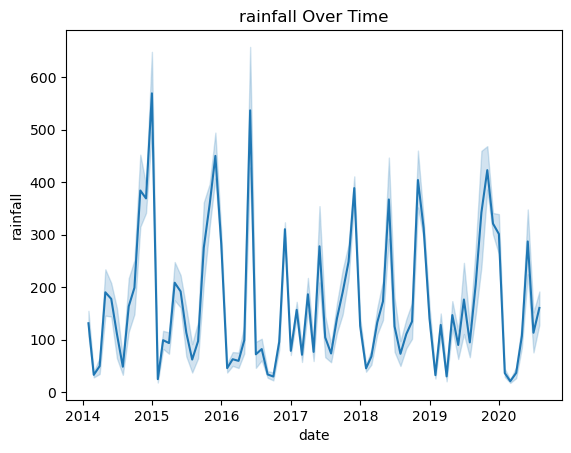

In [47]:
sns.lineplot(x='date', y='rainfall', data=df)
# plt.ylim(0, 1200)
plt.title('rainfall Over Time')
plt.show()

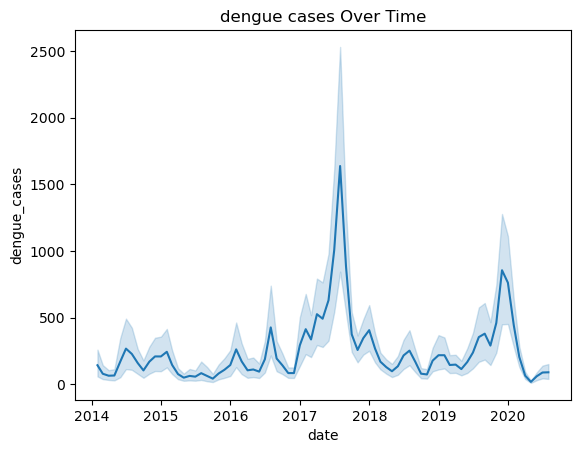

In [32]:
sns.lineplot(x='date', y='dengue_cases', data=df)
plt.title('dengue cases Over Time')
plt.show()

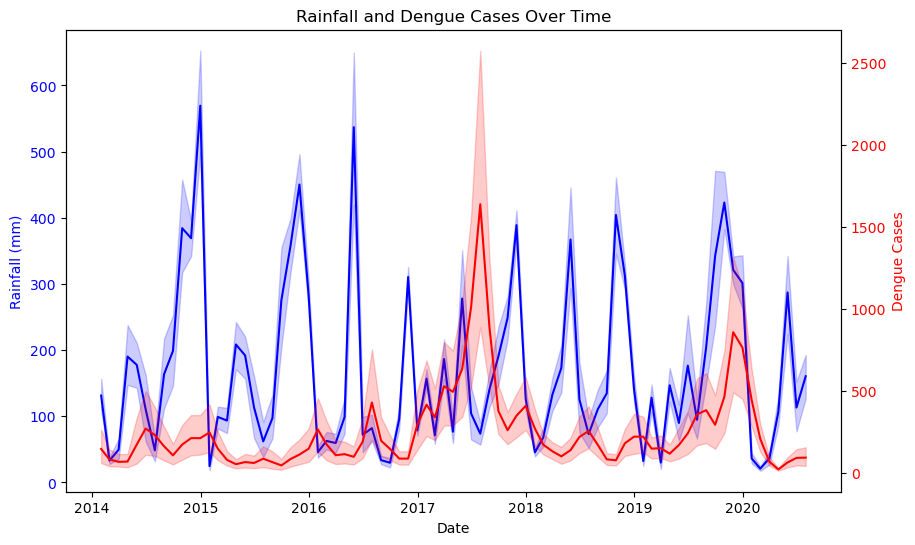

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(10,6))

# Plot rainfall on the primary y-axis
sns.lineplot(x='date', y='rainfall', data=df, ax=ax1, color='b')
ax1.set_xlabel('Date')
ax1.set_ylabel('Rainfall (mm)', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Create a second y-axis to plot dengue cases
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

# Plot dengue cases on the secondary y-axis
sns.lineplot(x='date', y='dengue_cases', data=df, ax=ax2, color='r')
ax2.set_ylabel('Dengue Cases', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Add title
plt.title('Rainfall and Dengue Cases Over Time')

# Show the plot
plt.show()


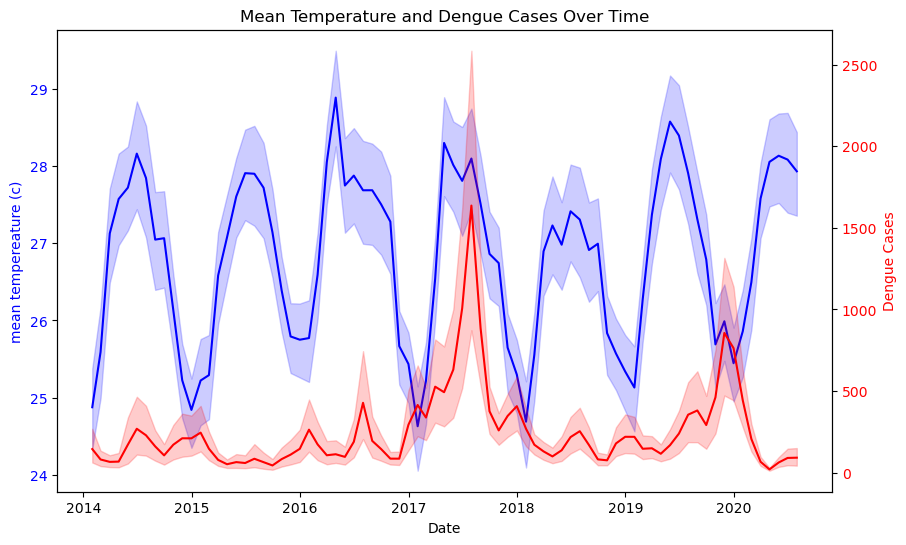

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(10,6))

# Plot rainfall on the primary y-axis
sns.lineplot(x='date', y='mean temp', data=df, ax=ax1, color='b')
ax1.set_xlabel('Date')
ax1.set_ylabel('mean tempereature (c)', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Create a second y-axis to plot dengue cases
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

# Plot dengue cases on the secondary y-axis
sns.lineplot(x='date', y='dengue_cases', data=df, ax=ax2, color='r')
ax2.set_ylabel('Dengue Cases', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Add title
plt.title('Mean Temperature and Dengue Cases Over Time')

# Show the plot
plt.show()


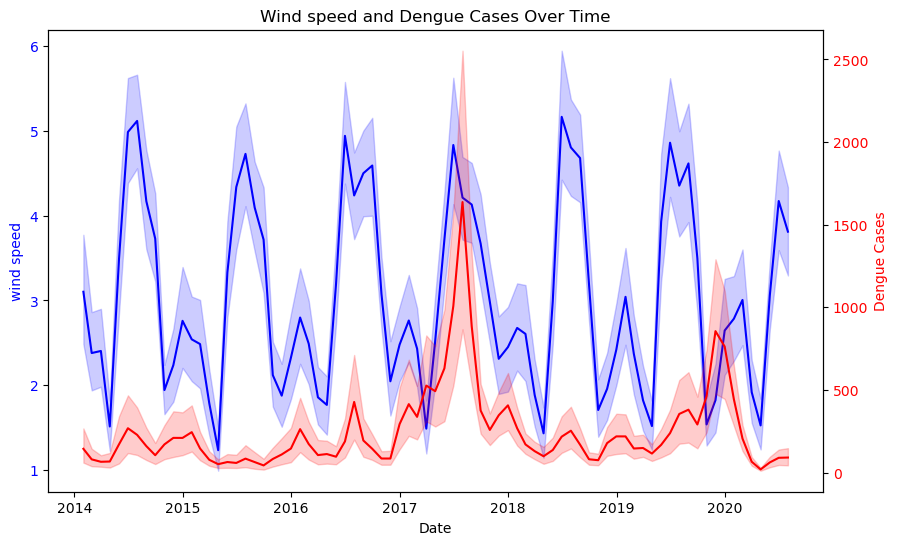

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(10,6))

# Plot rainfall on the primary y-axis
sns.lineplot(x='date', y='wind speed', data=df, ax=ax1, color='b')
ax1.set_xlabel('Date')
ax1.set_ylabel('wind speed', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Create a second y-axis to plot dengue cases
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

# Plot dengue cases on the secondary y-axis
sns.lineplot(x='date', y='dengue_cases', data=df, ax=ax2, color='r')
ax2.set_ylabel('Dengue Cases', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Add title
plt.title('Wind speed and Dengue Cases Over Time')

# Show the plot
plt.show()

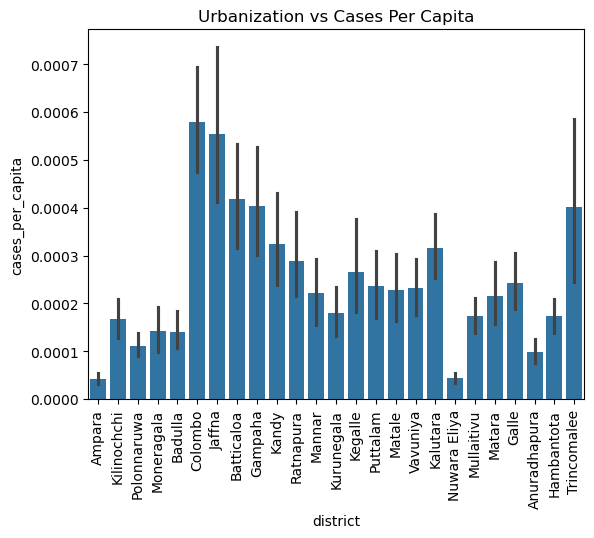

In [40]:
sns.barplot(x='district', y='cases_per_capita', data=df)
plt.title('Urbanization vs Cases Per Capita')
plt.xticks(rotation=90)
plt.show()